In [2]:
#from  IPython.displayIPython  import display

#import libaires

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import cython
from ripser import ripser, plot_dgms
import wfdb





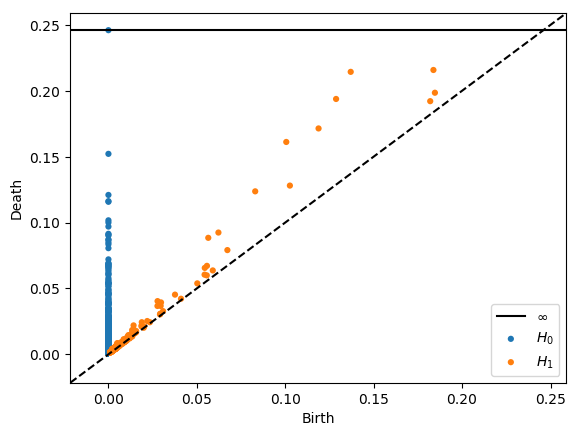

<class 'NoneType'>


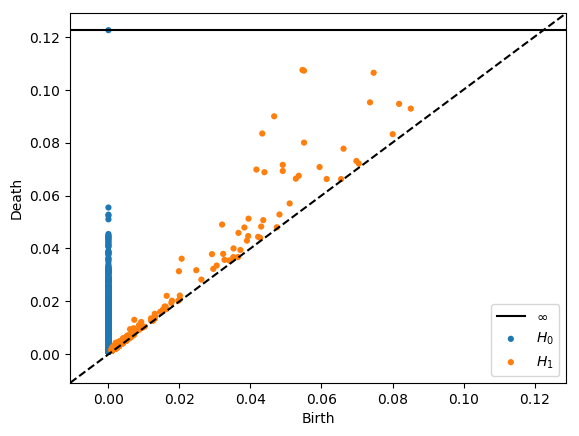

In [ ]:
def makePersistDiagram(theDimension,numOfSec,ID,Path):
    #specify your path to file 
    theSamp = wfdb.rdsamp(Path  + ID)
    theData = theSamp[0]
    theData = theData[0:numOfSec]
    if(numOfSec % theDimension == 0):
        theFinData = theData.reshape(numOfSec//theDimension,theDimension)
        diagrams = ripser(theFinData)['dgms']
        plot_dgms(diagrams, show=True,save ="ID"+".jpg")

print(type(makePersistDiagram(2,3200,"A07872",'/home/dr-dunstan/Downloads/training2017/')))
     
def makeDiaFromCSV(dataType):
    lineSkip = 0
    theCSV = open("200_set_of_Norm_AF_Rand.csv")
    if(dataType == "Normal"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/" + b)
                theData = len(theSamp[0])
                makePersistDiagram(2,theData,b,'/home/dr-dunstan/Downloads/training2017/')
            lineSkip += 1
    elif(dataType == "AF"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/" + c)
                theData = len(theSamp[0])
                makePersistDiagram(2,theData,c,'/home/dr-dunstan/Downloads/training2017/')
            lineSkip += 1
    elif(dataType == "Random"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/"+ d)
                theData = len(theSamp[0])
                makePersistDiagram(2,theData,d,'/home/dr-dunstan/Downloads/training2017/')
            lineSkip += 1
    else:
        print("Datatype dosent exsit")

makeDiaFromCSV("Normal")